In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(-90, 90, size = 1500)

longs = np.random.uniform(-180, 180, size = 1500)

lat_lngs = zip(lats, longs) # zip puts two arrays in pairs

lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.

In [5]:
# each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [8]:
# Import requests library
import requests

from config import weather_api_key

In [9]:
#Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL. (Will show an error page since no endpoint is added to URL)

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try: 
        # Run an API request for each of the cities.
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chingola
Processing Record 2 of Set 1 | namatanai
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | tilichiki
Processing Record 6 of Set 1 | najran
Processing Record 7 of Set 1 | yulara
Processing Record 8 of Set 1 | djambala
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | deputatskiy
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | isla mujeres
Processing Record 18 of Set 1 | bonthe
Processing Record 19 of Set 1 | micheweni
Processing Record 20 of Set 1 | manta
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | nanortalik
Processing Record 23 of Set 1 | esik
Processi

In [12]:
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chingola,-12.5290,27.8838,61.18,44,2,4.50,ZM,2022-07-26 18:28:38
1,Namatanai,-3.6667,152.4333,78.76,80,89,6.51,PG,2022-07-26 18:28:38
2,Hobart,-42.8794,147.3294,44.46,94,100,4.61,AU,2022-07-26 18:28:39
3,Saint-Philippe,-21.3585,55.7679,67.59,79,29,8.32,RE,2022-07-26 18:28:39
4,Tilichiki,60.4667,166.1000,48.97,82,98,4.72,RU,2022-07-26 18:28:39
5,Najran,17.4924,44.1277,88.45,32,100,4.83,SA,2022-07-26 18:28:39
6,Yulara,-25.2406,130.9889,44.28,56,0,9.48,AU,2022-07-26 18:28:40
7,Djambala,-2.5447,14.7533,74.05,62,86,4.56,CG,2022-07-26 18:28:40
8,Atuona,-9.8000,-139.0333,77.49,74,5,16.93,PF,2022-07-26 18:28:40
9,Albany,42.6001,-73.9662,76.78,51,86,7.58,US,2022-07-26 18:27:00


In [13]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chingola,ZM,2022-07-26 18:28:38,-12.5290,27.8838,61.18,44,2,4.50
1,Namatanai,PG,2022-07-26 18:28:38,-3.6667,152.4333,78.76,80,89,6.51
2,Hobart,AU,2022-07-26 18:28:39,-42.8794,147.3294,44.46,94,100,4.61
3,Saint-Philippe,RE,2022-07-26 18:28:39,-21.3585,55.7679,67.59,79,29,8.32
4,Tilichiki,RU,2022-07-26 18:28:39,60.4667,166.1000,48.97,82,98,4.72
...,...,...,...,...,...,...,...,...,...
580,Baykit,RU,2022-07-26 18:43:50,61.6700,96.3700,60.80,97,95,4.70
581,Ugoofaaru,MV,2022-07-26 18:43:50,5.6667,73.0000,81.25,79,53,16.24
582,Srednekolymsk,RU,2022-07-26 18:43:50,67.4500,153.6833,39.85,79,84,14.74
583,Half Moon Bay,US,2022-07-26 18:43:51,37.4636,-122.4286,81.05,69,75,10.36


In [14]:
# Create output csv file

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.

import time

# Get today's date in seconds.

today = time.time()

today

1658862521.2768505

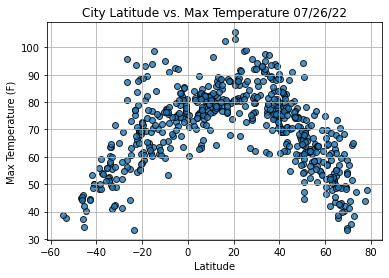

In [19]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats, 
            max_temps, 
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot

plt.show()

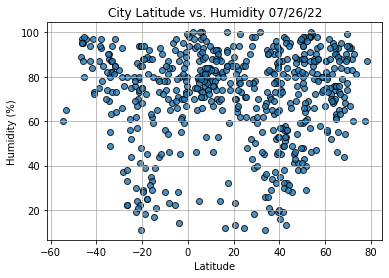

In [20]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

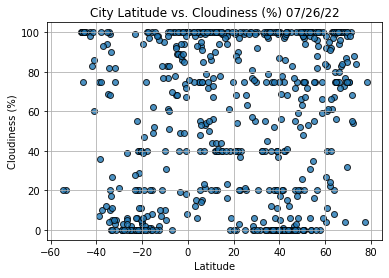

In [21]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

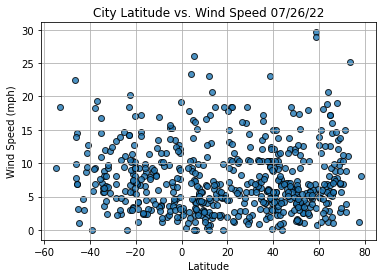

In [22]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()